In [1]:
#import all the package required for load, working and visualizing data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#load the dataset
df=pd.read_csv('covid_19_india.csv')
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/2020,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/2020,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/2020,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/2020,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/2020,6:00 PM,Kerala,3,0,0,0,3


In [4]:
#select state as Maharashtra as we would be forecasting for this state
data = df.loc[df['State/UnionTerritory'] == 'Maharashtra']

In [5]:
data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
76,77,09/03/2020,6:00 PM,Maharashtra,2,0,0,0,2
91,92,10/03/2020,6:00 PM,Maharashtra,5,0,0,0,5
97,98,11/03/2020,6:00 PM,Maharashtra,2,0,0,0,2
120,121,12/03/2020,6:00 PM,Maharashtra,11,0,0,0,11
133,134,13/03/2020,6:00 PM,Maharashtra,14,0,0,0,14


In [6]:
data.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
8330,8331,12/11/2020,8:00 AM,Maharashtra,-,-,1597255,45560,1731833
8365,8366,13/11/2020,8:00 AM,Maharashtra,-,-,1605064,45682,1736329
8400,8401,14/11/2020,8:00 AM,Maharashtra,-,-,1609607,45809,1740461
8435,8436,15/11/2020,8:00 AM,Maharashtra,-,-,1612314,45914,1744698
8470,8471,16/11/2020,8:00 AM,Maharashtra,-,-,1615379,45974,1747242


In [7]:
data.describe

<bound method NDFrame.describe of        Sno        Date     Time State/UnionTerritory ConfirmedIndianNational  \
76      77  09/03/2020  6:00 PM          Maharashtra                       2   
91      92  10/03/2020  6:00 PM          Maharashtra                       5   
97      98  11/03/2020  6:00 PM          Maharashtra                       2   
120    121  12/03/2020  6:00 PM          Maharashtra                      11   
133    134  13/03/2020  6:00 PM          Maharashtra                      14   
...    ...         ...      ...                  ...                     ...   
8330  8331  12/11/2020  8:00 AM          Maharashtra                       -   
8365  8366  13/11/2020  8:00 AM          Maharashtra                       -   
8400  8401  14/11/2020  8:00 AM          Maharashtra                       -   
8435  8436  15/11/2020  8:00 AM          Maharashtra                       -   
8470  8471  16/11/2020  8:00 AM          Maharashtra                       -   

     

In [8]:
data.info

<bound method DataFrame.info of        Sno        Date     Time State/UnionTerritory ConfirmedIndianNational  \
76      77  09/03/2020  6:00 PM          Maharashtra                       2   
91      92  10/03/2020  6:00 PM          Maharashtra                       5   
97      98  11/03/2020  6:00 PM          Maharashtra                       2   
120    121  12/03/2020  6:00 PM          Maharashtra                      11   
133    134  13/03/2020  6:00 PM          Maharashtra                      14   
...    ...         ...      ...                  ...                     ...   
8330  8331  12/11/2020  8:00 AM          Maharashtra                       -   
8365  8366  13/11/2020  8:00 AM          Maharashtra                       -   
8400  8401  14/11/2020  8:00 AM          Maharashtra                       -   
8435  8436  15/11/2020  8:00 AM          Maharashtra                       -   
8470  8471  16/11/2020  8:00 AM          Maharashtra                       -   

     Co

In [9]:
cols=['Sno', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths']

In [10]:
#drop all the columns other than confirmed and dates as we would be using these two for forecasting
data.drop(cols, axis=1, inplace=True)

In [11]:
data.head()

,Date,Confirmed
76,09/03/2020,2
91,10/03/2020,5
97,11/03/2020,2
120,12/03/2020,11
133,13/03/2020,14


In [12]:
#set date as index
data.set_index('Date',inplace=True)

<AxesSubplot:xlabel='Date'>

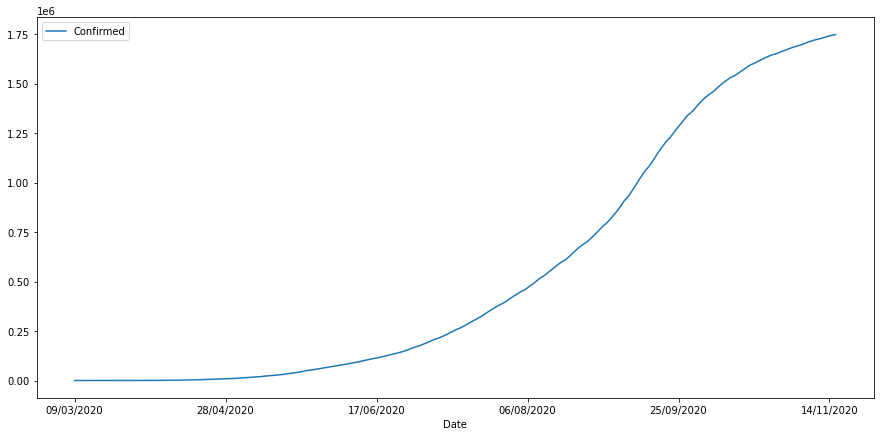

In [13]:
#plot graph for confirmed cases
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
data.plot()

In [14]:
#To check the stationarity of data we would use adfuller test
from statsmodels.tsa.stattools import adfuller

In [15]:
test_result=adfuller(data['Confirmed'])

In [16]:
def adfuller_test(Confirmed):
    results=adfuller(Confirmed)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(results,labels):
        print(label+' : '+str(value) )
        if results[1] <= 0.05:
            print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
        else:
            print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(data['Confirmed'])



ADF Test Statistic : -0.4698461401741714
weak evidence against null hypothesis,indicating it is non-stationary 
p-value : 0.8977677164812323
weak evidence against null hypothesis,indicating it is non-stationary 
#Lags Used : 16
weak evidence against null hypothesis,indicating it is non-stationary 
Number of Observations : 236
weak evidence against null hypothesis,indicating it is non-stationary 


In [17]:
data['Confirmed First Difference'] = data['Confirmed'] - df['Confirmed'].shift(1)
data['Seasonal First Difference']=data['Confirmed']-data['Confirmed'].shift(65)
data.head()

,Confirmed,Confirmed First Difference,Seasonal First Difference
Date,,,
09/03/2020,2,NaN,NaN
10/03/2020,5,NaN,NaN
11/03/2020,2,NaN,NaN
12/03/2020,11,NaN,NaN
13/03/2020,14,NaN,NaN


In [18]:
adfuller_test(data['Seasonal First Difference'].dropna())

ADF Test Statistic : -2.901590689392879
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
p-value : 0.0451633343823833
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
#Lags Used : 9
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
Number of Observations : 178
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


<AxesSubplot:xlabel='Date'>

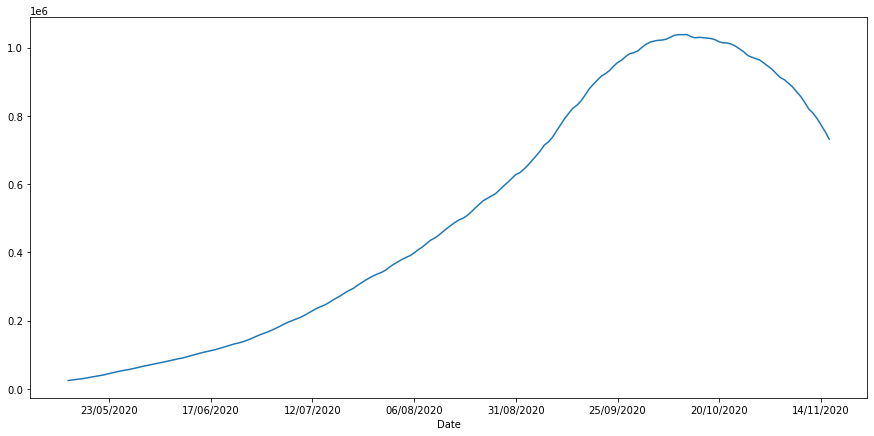

In [19]:
data['Seasonal First Difference'].plot()

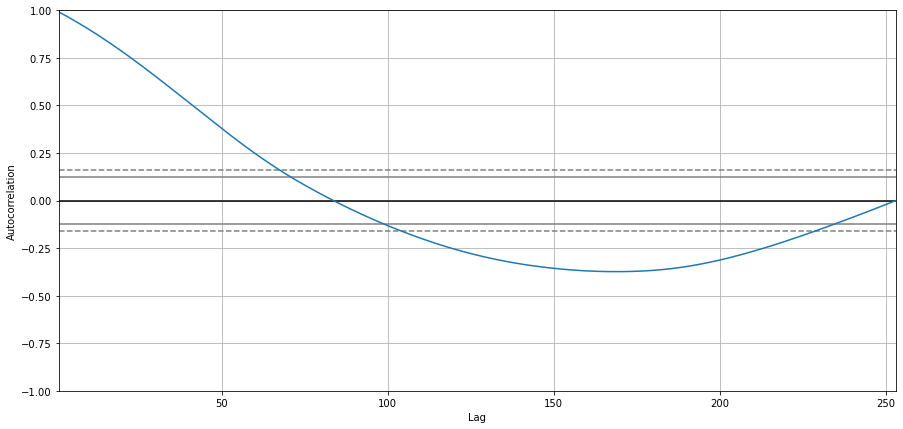

In [20]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Confirmed'])
plt.show()

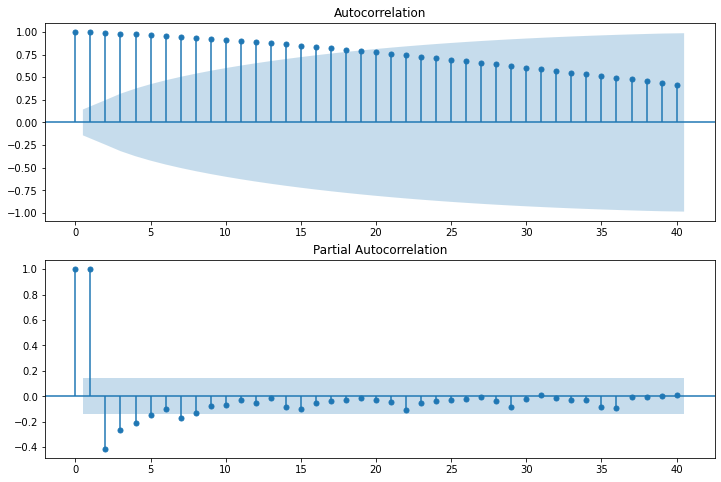

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [22]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(data['Confirmed'],order=(0,1,1))
model_fit=model.fit()
model_fit.summary()

C:\Users\vidha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vidha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\vidha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vidha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Confirmed   No. Observations:                  252
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2429.463
Method:                       css-mle   S.D. of innovations           3710.176
Date:                Thu, 24 Dec 2020   AIC                           4864.925
Time:                        00:07:48   BIC                           4875.513
Sample:                             1   HQIC                          4869.186
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              6906.8470    438.534     15.750      0.000    6047.337    7766.357
ma.L1.D.Confirmed     0.8798      0.023     38.730      0.000       0.835       0.924
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.1366           +0.0000j            1.1366            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Date'>

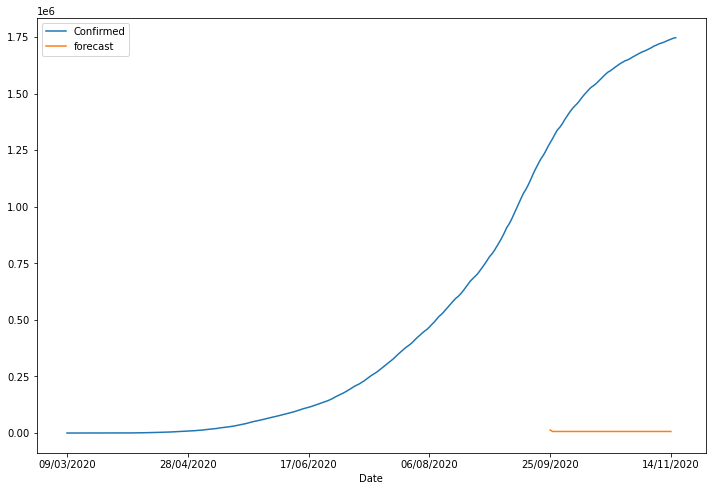

In [36]:
data['forecast']=model_fit.predict(start=200,end=250,dynamic=True)
data[['Confirmed','forecast']].plot(figsize=(12,8))

C:\Users\vidha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vidha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\vidha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vidha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

<AxesSubplot:xlabel='Date'>

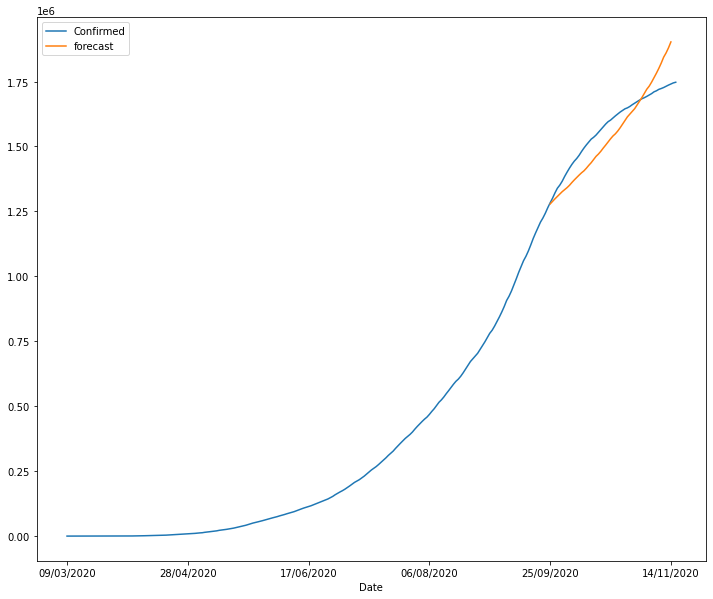

In [42]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data['Confirmed'],order=(0, 1, 1),seasonal_order=(1,1,1,65))
results=model.fit()
data['forecast']=results.predict(start=200,end=250,dynamic=True)
data[['Confirmed','forecast']].plot(figsize=(12,10))